In [2]:
import sen

In [1]:
import ast
import logging
import pickle

import numpy as np
import pandas as pd
import tqdm
from sklearn import feature_extraction, metrics

from github_search import python_function_code
from docstring_parser import parse as parse_docstrings
from comment_parser import comment_parser

logging.basicConfig(level="INFO")

import sentence_transformers

# CODE PARROT
# CODE PARROT
# CODE PARROT
# CODE PARROT
# CODE PARROT
# CODE PARROT

In [3]:
%cd ../..

/home/kuba/Projects/github_search


In [5]:
embedding_model = sentence_transformers.SentenceTransformer("output/sbert/sru2x256_epoch30imports+comments/")

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: output/sbert/sru2x256_epoch30imports+comments/
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


In [ ]:
embedding_model.encode()

In [3]:
comments_df = pd.read_feather("output/selected_python_files_comments.feather")

In [6]:
imports_df = pd.read_feather("output/selected_python_files_imports.feather")

In [28]:
repo_imports = imports_df.groupby("repo").apply(lambda df: "\n".join(df['imports'])).dropna()

In [29]:
nonempty_imports_df = imports_df[imports_df['imports'].str.split().apply(len) > 0]

In [39]:
import_embeddings = nonempty_imports_df.groupby("repo").apply(lambda df: embedding_model.encode(df['imports'].values, show_progress_bar=False))#embedding_model.encode(nonempty_imports_df['imports'].values)

In [49]:
import_embeddings.apply(lambda df: df.shape[0]).describe()

count    33657.000000
mean         6.513742
std          3.085203
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         10.000000
dtype: float64

In [50]:
repo_embeddings = import_embeddings.apply(lambda embs: embs.mean(axis=0))

In [94]:
repo_embeddings_vectors = np.stack(repo_embeddings.values)

In [61]:
paperswithcode_df = pd.read_csv("data/paperswithcode_with_tasks.csv")

In [65]:
tasks = paperswithcode_df['tasks'].apply(ast.literal_eval).explode().drop_duplicates()

In [210]:
task_embeddings = tasks.apply(embedding_model.encode, show_progress_bar=False)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

RuntimeError: Cannot pack empty tensors.

In [131]:
task_embeddings_vectors = np.stack(task_embeddings)

In [252]:
def get_similar(target_embeddings, source_embeddings, topk=5):
    source = source_embeddings.index
    target = target_embeddings.index 
    source_embeddings = np.stack(source_embeddings.values)
    target_embeddings = np.stack(target_embeddings.values)
    best_matching_idxs = pd.DataFrame(metrics.pairwise.cosine_distances(source_embeddings, target_embeddings).argsort(axis=1)[:,:topk])
    best_similar_targets_df = pd.DataFrame(index=source, data=target[best_matching_idxs.values.reshape(-1)].values.reshape(best_matching_idxs.shape[0], -1))
    best_similar_targets = best_similar_targets_df.apply(lambda s: list(s), axis=1)
    best_similar_targets.name = "retrieved_tasks"
    return best_similar_targets

In [249]:
repo_embeddings.index

Index(['000Justin000/torchdiffeq', '008karan/SincNet_demo',
       '00marco/pydnet-duplicate', '011235813/SEPT', '011235813/cm3',
       '011235813/hierarchical-marl', '011235813/lio', '0411tony/Yue',
       '0492wzl/tensorflow_slim_densenet',
       '07Agarg/Image-Resolution-Enhancement-SRCNN',
       ...
       'zzwells/jdd2018-population-forecast', 'zzxslp/CosRec',
       'zzy123abc/BSN-boundary-sensitive-network-master', 'zzyunzhi/vds',
       'zzz1515151/self-supervised_learning_sketch',
       'zzz2010/starganv2_paddle', 'zzzace2000/FIDO-saliency',
       'zzzace2000/autodiagnosis', 'zzzace2000/dropout-feature-ranking',
       'zzzace2000/mimic-preprocess'],
      dtype='object', name='repo', length=33657)

In [250]:
target_embeddings

NameError: name 'target_embeddings' is not defined

In [254]:
best_matching_task_repos = get_similar(repo_embeddings, task_embeddings)

In [256]:
best_matching_task_repos.apply(lambda )

['DennisCraandijk/DL-Abstract-Argumentation',
 'tvayer/PSCN',
 'rezanmz/GL-Coarsener',
 'anonymous-sourcecode/Graph-Bert',
 'thomasccp/eagle']

In [193]:
repos_with_tasks = paperswithcode_df[['repo', 'tasks']].merge(best_matching_repo_tasks, right_index=True, left_on='repo').set_index("repo")

In [200]:
repos_with_tasks.apply(lambda ts: len(set(ts[0]).intersection(ts[1])) / len(ts[1]), axis=1)

repo
000Justin000/torchdiffeq              0.0
008karan/SincNet_demo                 0.0
00marco/pydnet-duplicate              0.0
011235813/SEPT                        0.0
011235813/cm3                         0.0
                                     ... 
zzz2010/starganv2_paddle              0.0
zzzace2000/FIDO-saliency              0.0
zzzace2000/autodiagnosis              0.0
zzzace2000/dropout-feature-ranking    0.0
zzzace2000/mimic-preprocess           0.0
Length: 33657, dtype: float64

In [218]:
best_matching_task_tasks = get_similar(tasks, task_embeddings, topk=6).apply(lambda t: t[1:])

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

In [236]:
best_matching_task_tasks.iloc[[100]]

tasks
relation extraction    [joint entity and relation extraction, keyword extraction, aspect extraction, event extraction, temporal information extraction]
Name: retrieved_tasks, dtype: object

In [232]:
pd.set_option('display.max_colwidth', 200)


In [238]:
best_matching_task_tasks

tasks
graph learning                                                       [graph representation learning, graph regression, representation learning, graph sampling, q learning]
active learning                                                           [incremental learning, meta learning, continual learning, curriculum learning, transfer learning]
latent variable models                                                    [topic models, variational inference, model selection, gaussian processes, structured prediction]
multivariate time series forecasting    [multivariate time series imputation, time series forecasting, trajectory forecasting, time series prediction, weather forecasting]
multivariate time series imputation                        [multivariate time series forecasting, imputation, time series forecasting, time series prediction, time series]
                                                                                                       ...                            

In [22]:
repo_imports.shape

(33984,)

In [38]:
data_df = imports_df.merge(comments_df, on=['repo', 'path'])

In [44]:
data_df.to_csv("output/selected_python_files_comments_imports.csv")

In [40]:
repo = imports_df['repo'].iloc[20]

In [41]:
data_df[data_df['repo'] == repo]

,repo,path,imports,comments
12,00marco/pydnet-duplicate,webcam.py,import tensorflow as tf\nimport sys\nimport os...,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
13,00marco/pydnet-duplicate,experiments.py,import os\nimport numpy as np\nimport argparse...,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
14,00marco/pydnet-duplicate,generate_depth_map.py,import tensorflow as tf\nimport sys\nimport os...,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
15,00marco/pydnet-duplicate,utils.py,import numpy as np\nfrom matplotlib import cm\...,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
16,00marco/pydnet-duplicate,eta_pydnet.py,import tensorflow as tf\nimport sys\nfrom pyga...,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
17,00marco/pydnet-duplicate,layers.py,import tensorflow as tf,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
18,00marco/pydnet-duplicate,training_code/layers.py,import tensorflow as tf,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
19,00marco/pydnet-duplicate,pydnet.py,from layers import *,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
20,00marco/pydnet-duplicate,training_code/pydnet.py,from layers import *,MIT License\n\n Copyright (c) 2018 Matteo Pogg...
21,00marco/pydnet-duplicate,training_code/monodepth_model.py,from collections import namedtuple\nimport num...,monodepth model\n#<NEWCOMMENT>Copyright UCL Bu...


In [25]:
comments_df.iloc[20]['comments']#.split("#<NEWCOMMENT>")

'MIT License\n\n Copyright (c) 2018 Matteo Poggi m.poggi@unibo.it\n\n Permission is hereby granted, free of charge, to any person obtaining a copy\n of this software and associated documentation files (the "Software"), to deal\n in the Software without restriction, including without limitation the rights\n to use, copy, modify, merge, publish, distribute, sublicense, and/or sell\n copies of the Software, and to permit persons to whom the Software is\n furnished to do so, subject to the following conditions:\n The above copyright notice and this permission notice shall be included in all\n copies or substantial portions of the Software.\n THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\n IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\n FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\n AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\n LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT O

In [ ]:
imports_df.columns = ['repo', 'path', 'imports']

In [1]:
imports_df

NameError: name 'imports_df' is not defined

In [117]:
imports_df.merge(comments_df, on=["repo", "path"])['imports'].head()

0    f\nr\no\nm\n \n.\nt\ns\ni\nt\n5\n \ni\nm\np\no...
1    i\nm\np\no\nr\nt\n \nc\no\nl\nl\ne\nc\nt\ni\no...
2    i\nm\np\no\nr\nt\n \nt\no\nr\nc\nh\n\n\nf\nr\n...
3    i\nm\np\no\nr\nt\n \nt\no\nr\nc\nh\n\n\ni\nm\n...
4    i\nm\np\no\nr\nt\n \nw\na\nr\nn\ni\nn\ng\ns\n\...
Name: imports, dtype: object

In [96]:
selected_files_df = pd.read_feather("output/selected_python_files.feather")

In [97]:
len(selected_files_df)

232676

<AxesSubplot:ylabel='Frequency'>

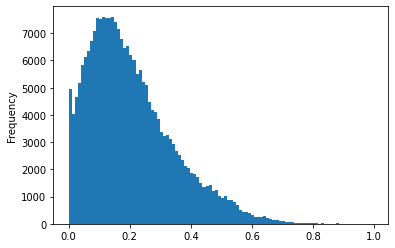

In [4]:
selected_files_df['similarity'].plot.hist(bins=100)

In [5]:
selected_files_df = selected_files_df[selected_files_df['similarity'] > selected_files_df['similarity'].mean()]

<AxesSubplot:ylabel='Frequency'>

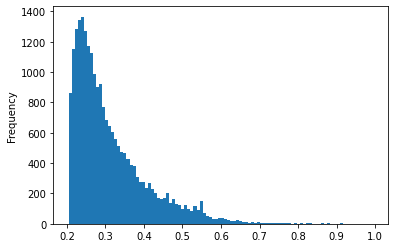

In [6]:
selected_files_df.groupby("repo")['similarity'].agg(["median", "mean"])['median'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

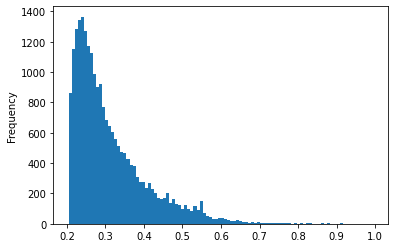

In [7]:
selected_files_df.groupby("repo")['similarity'].agg(["median", "mean"])['median'].plot.hist(bins=100)

In [8]:
from comment_parser import comment_parser

In [9]:
from github_search import parsing_imports

In [10]:
print(selected_files_df['content'].iloc[0])

from .tsit5 import Tsit5Solver
from .dopri5 import Dopri5Solver
from .fixed_grid import Euler, Midpoint, RK4
from .fixed_adams import AdamsBashforth, AdamsBashforthMoulton
from .adams import VariableCoefficientAdamsBashforth
from .misc import _check_inputs

SOLVERS = {
    'explicit_adams': AdamsBashforth,
    'fixed_adams': AdamsBashforthMoulton,
    'adams': VariableCoefficientAdamsBashforth,
    'tsit5': Tsit5Solver,
    'dopri5': Dopri5Solver,
    'euler': Euler,
    'midpoint': Midpoint,
    'rk4': RK4,
}


def odeint(func, y0, t, rtol=1e-7, atol=1e-9, method=None, options=None):
    """Integrate a system of ordinary differential equations.

    Solves the initial value problem for a non-stiff system of first order ODEs:
        ```
        dy/dt = func(t, y), y(t[0]) = y0
        ```
    where y is a Tensor of any shape.

    Output dtypes and numerical precision are based on the dtypes of the inputs `y0`.

    Args:
        func: Function that maps a Tensor holding the state `y`

In [11]:
import astunparse

[astunparse.unparse(imp) for imp in list(parsing_imports.get_import_expressions(selected_files_df['content'].iloc[0]))]

['\nfrom .tsit5 import Tsit5Solver\n',
 '\nfrom .dopri5 import Dopri5Solver\n',
 '\nfrom .fixed_grid import Euler, Midpoint, RK4\n',
 '\nfrom .fixed_adams import AdamsBashforth, AdamsBashforthMoulton\n',
 '\nfrom .adams import VariableCoefficientAdamsBashforth\n',
 '\nfrom .misc import _check_inputs\n']

In [12]:
contents = selected_files_df['content'].iloc[0]
comment_parser.extract_comments_from_str(contents)

[]

In [99]:
list(parsing_imports.get_import_expressions(contents))

In [15]:
docstring = parse_docstrings(contents)

In [91]:
def get_docstrings(file_contents):
    root = ast.parse(file_contents)
    for node in ast.iter_child_nodes(root):
        if isinstance(node, ast.FunctionDef) or isinstance(node, ast.ClassDef):
            maybe_docstring = ast.get_docstring(node)
            if maybe_docstring is not None:
                yield maybe_docstring


def get_imports(file_contents):
    return '\n'.join(list([astunparse.unparse(imp).strip() for imp in parsing_imports.get_import_expressions(file_contents)]))


def segment_contiguous(items, indices, neighbor_threshold):
    if len(items) == 0:
        return []
    returned_items = []
    tmp = [items[0]]
    for i in range(1, len(items)):
        if indices[i] - indices[i-1] <= neighbor_threshold:
            tmp.append(items[i])
        else:
            returned_items.append(tmp)
            tmp = [items[i]]
    returned_items.append(tmp)
    return returned_items


def get_comments_and_docstrings(file_contents, neighbor_threshold):
    docstrings = list(get_docstrings(file_contents))
    comments = comment_parser.extract_comments_from_str(file_contents, mime='text/x-script.python')
    comment_texts = [com.text() for com in comments]
    comment_line_nos = [com.line_number() for com in comments] 
    return docstrings + ["\n".join(seg).strip() for seg in segment_contiguous(comment_texts, comment_line_nos, neighbor_threshold)]


def extract_python_comments(upstream, product, line_neighbor_threshold):
    files_df = pd.read_feather(upstream).drop_duplicates
    comments = selected_files_df['content'].apply(utils.try_run(partial(get_comments_and_docstrings, neighbor_threshold=line_neighbor_threshold), default=[]))
    files_df['comments'] = comments
    files_df.to_feather(str(product))

In [68]:
from github_search import utils 

In [69]:
l = []

In [70]:
[foo.dupa() for foo in l]

[]

In [71]:
get_comments_and_docstrings(selected_files_df.iloc[5]['content'])

['!/usr/bin/env python3\n TIMIT_preparation \n Mirco Ravanelli \n Mila - University of Montreal \n July 2018\n Description: \n This code prepares TIMIT for the following speaker identification experiments. \n It removes start and end silences according to the information reported in the *.wrd files and normalizes the amplitude of each sentence.\n How to run it:\n python TIMIT_preparation.py $TIMIT_FOLDER $OUTPUT_FOLDER data_lists/TIMIT_all.scp \n NOTE: This script expects filenames in lowercase (e.g, train/dr1/fcjf0/si1027.wav" rather than "TRAIN/DR1/FCJF0/SI1027.WAV)',
 'Read List file',
 'Replicate input folder structure to output folder',
 'Speech Data Reverberation Loop',
 'Open the wav file',
 'Signal normalization',
 'Read wrd file',
 'Remove silences',
 'Save normalized speech']

In [83]:
selected_files_df

,repo,similarity,path,content
0,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
1,000Justin000/torchdiffeq,0.402928,torchdiffeq/_impl/rk_common.py,# Based on https://github.com/tensorflow/tenso...
2,000Justin000/torchdiffeq,0.400493,torchdiffeq/_impl/interp.py,import torch\nfrom .misc import _convert_to_te...
3,000Justin000/torchdiffeq,0.343509,torchdiffeq/_impl/adjoint.py,import torch\nimport torch.nn as nn\nfrom . im...
4,000Justin000/torchdiffeq,0.298963,torchdiffeq/_impl/misc.py,import warnings\nimport torch\n\n\ndef _flatte...
...,...,...,...,...
232671,zzzace2000/mimic-preprocess,0.252215,scripts/create_length_of_stay.py,import os\nimport argparse\nimport numpy as np...
232672,zzzace2000/mimic-preprocess,0.252172,scripts/create_multitask.py,import os\nimport argparse\nimport numpy as np...
232673,zzzace2000/mimic-preprocess,0.250934,mimic3models/decompensation/main.py,import numpy as np\nimport argparse\nimport ti...
232674,zzzace2000/mimic-preprocess,0.243027,scripts/create_decompensation.py,import os\nimport argparse\nimport numpy as np...


In [73]:
%%time
comments = selected_files_df.iloc[:10000]['content'].apply(utils.try_run(get_comments_and_docstrings, default=[]))

CPU times: user 41.3 s, sys: 81.9 ms, total: 41.3 s
Wall time: 41.3 s


In [74]:
comments

0        [Integrate a system of ordinary differential e...
1        [Saved state of the Runge Kutta solver.\n\nAtt...
2        [Fit coefficients for 4th order polynomial int...
3        [TODO: use a nn.Module and call odeint_adjoint...
4        [Calculate a scaled, vector inner product betw...
                               ...                        
24306                                                   []
24307    [Load in our graph using rdflib, Create some l...
24308    [Generate a set of all possible (vertex, depth...
24311                                                   []
24312    [Limit numpy"s number of threads, Base imports...
Name: content, Length: 10000, dtype: object

In [75]:
selected_nonduplicate_files_df = selected_files_df.drop_duplicates(subset=["repo", "path"])

In [76]:
def segment_contiguous(items, indices):
    returned_items = []
    tmp = [items[0]]
    for i in range(1, len(items)):
        if indices[i-1] + 1 == indices[i]:
            tmp.append(items[i])
        else:
            returned_items.append(tmp)
            tmp = [items[i]]
    returned_items.append(tmp)
    return returned_items

In [66]:
segment_contiguous(['a', 'b', 'c'], [0,2,3], 2)

[['a'], ['b', 'c']]

In [178]:
assert segment_contiguous(['a', 'b', 'c'], [1,2,4]) == [['a', 'b'], ['c']]

In [179]:
assert segment_contiguous(['a', 'b', 'c'], [1,3,5]) == [['a'], ['b'], ['c']]

In [34]:
selected_files_df.iloc[6]

repo                                      008karan/SincNet_demo
similarity                                             0.299662
path                                        compute_d_vector.py
content       # compute_d_vector.py\n# Mirco Ravanelli \n# M...
Name: 6, dtype: object

In [77]:
cs = comment_parser.extract_comments_from_str(selected_files_df.iloc[6]['content'])

In [78]:
comment_texts = [com.text() for com in cs]
comment_line_nos = [com.line_number() for com in cs] 

In [81]:
list(zip(comment_texts, comment_line_nos)) #segment_contiguous(comment_texts, comment_line_nos)

[(' compute_d_vector.py', 1),
 (' Mirco Ravanelli ', 2),
 (' Mila - University of Montreal ', 3),
 (' Feb 2019', 5),
 (' Description: ', 7),
 (' This code computes d-vectors using a pre-trained model', 8),
 (' Model to use for computing the d-vectors', 22),
 (' This is the model to use for computing the d-vectors (it should be pre-trained using the speaker-id DNN)',
  23),
 (' Config file of the speaker-id experiment used to generate the model', 24),
 ("te_lst='data_lists/TIMIT_test.scp' # List of the wav files to process", 25),
 (' output dictionary containing the a sentence id as key as the d-vector as value',
  27),
 (' Avoid frames with an energy that is 1/10 over the average energy', 31),
 ('device = None', 34),
 (' Reading cfg file', 36),
 ('[data]', 40),
 ('[windowing]', 44),
 ('[cnn]', 49),
 ('[dnn]', 61),
 ('[class]', 70),
 (' Folder creation', 84),
 (' loss function', 91),
 (' Converting context and shift in samples', 95),
 (' Batch_dev', 99),
 (' Feature extractor CNN', 103)

In [90]:
selected_files_df

,repo,similarity,path,content
0,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
1,000Justin000/torchdiffeq,0.402928,torchdiffeq/_impl/rk_common.py,# Based on https://github.com/tensorflow/tenso...
2,000Justin000/torchdiffeq,0.400493,torchdiffeq/_impl/interp.py,import torch\nfrom .misc import _convert_to_te...
3,000Justin000/torchdiffeq,0.343509,torchdiffeq/_impl/adjoint.py,import torch\nimport torch.nn as nn\nfrom . im...
4,000Justin000/torchdiffeq,0.298963,torchdiffeq/_impl/misc.py,import warnings\nimport torch\n\n\ndef _flatte...
...,...,...,...,...
232671,zzzace2000/mimic-preprocess,0.252215,scripts/create_length_of_stay.py,import os\nimport argparse\nimport numpy as np...
232672,zzzace2000/mimic-preprocess,0.252172,scripts/create_multitask.py,import os\nimport argparse\nimport numpy as np...
232673,zzzace2000/mimic-preprocess,0.250934,mimic3models/decompensation/main.py,import numpy as np\nimport argparse\nimport ti...
232674,zzzace2000/mimic-preprocess,0.243027,scripts/create_decompensation.py,import os\nimport argparse\nimport numpy as np...


NameError: name 'selected_nonduplicate_files_df' is not defined

In [39]:
comments.iloc[6]

['compute_d_vector.py\n Mirco Ravanelli \n Mila - University of Montreal',
 'Feb 2019',
 'Description: \n This code computes d-vectors using a pre-trained model',
 "Model to use for computing the d-vectors\n This is the model to use for computing the d-vectors (it should be pre-trained using the speaker-id DNN)\n Config file of the speaker-id experiment used to generate the model\nte_lst='data_lists/TIMIT_test.scp' # List of the wav files to process",
 'output dictionary containing the a sentence id as key as the d-vector as value',
 'Avoid frames with an energy that is 1/10 over the average energy',
 'device = None',
 'Reading cfg file',
 '[data]',
 '[windowing]',
 '[cnn]',
 '[dnn]',
 '[class]',
 'Folder creation',
 'loss function',
 'Converting context and shift in samples',
 'Batch_dev',
 'Feature extractor CNN',
 'Amplitude normalization',
 'computing energy on each frame:',
 'split signals into chunks',
 'averaging and normalizing all the d-vectors',
 'checks for nan',
 'saving th

In [102]:
selected_nonduplicate_files_df

,repo,similarity,path,content
0,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
4,000Justin000/torchdiffeq,0.402928,torchdiffeq/_impl/rk_common.py,# Based on https://github.com/tensorflow/tenso...
8,000Justin000/torchdiffeq,0.400493,torchdiffeq/_impl/interp.py,import torch\nfrom .misc import _convert_to_te...
12,000Justin000/torchdiffeq,0.343509,torchdiffeq/_impl/adjoint.py,import torch\nimport torch.nn as nn\nfrom . im...
16,000Justin000/torchdiffeq,0.298963,torchdiffeq/_impl/misc.py,import warnings\nimport torch\n\n\ndef _flatte...
...,...,...,...,...
404662,zzzace2000/mimic-preprocess,0.252395,mimic3models/length_of_stay/main.py,import numpy as np\nimport argparse\nimport ti...
404663,zzzace2000/mimic-preprocess,0.252215,scripts/create_length_of_stay.py,import os\nimport argparse\nimport numpy as np...
404664,zzzace2000/mimic-preprocess,0.252172,scripts/create_multitask.py,import os\nimport argparse\nimport numpy as np...
404665,zzzace2000/mimic-preprocess,0.250934,mimic3models/decompensation/main.py,import numpy as np\nimport argparse\nimport ti...


In [42]:
i = 0
es = []
for en, c in tqdm.tqdm(enumerate(selected_files_df.iloc[:10000]['content'])):
    try:
        get_comments_and_docstrings(c)
    except Exception as e:
        i += 1
        es.append((en, c, e))
        break

254it [00:00, 256.38it/s]


In [51]:
selected_files_df

,repo,similarity,path,content
0,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
1,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
2,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
3,000Justin000/torchdiffeq,0.536278,torchdiffeq/_impl/odeint.py,from .tsit5 import Tsit5Solver\nfrom .dopri5 i...
4,000Justin000/torchdiffeq,0.402928,torchdiffeq/_impl/rk_common.py,# Based on https://github.com/tensorflow/tenso...
...,...,...,...,...
404662,zzzace2000/mimic-preprocess,0.252395,mimic3models/length_of_stay/main.py,import numpy as np\nimport argparse\nimport ti...
404663,zzzace2000/mimic-preprocess,0.252215,scripts/create_length_of_stay.py,import os\nimport argparse\nimport numpy as np...
404664,zzzace2000/mimic-preprocess,0.252172,scripts/create_multitask.py,import os\nimport argparse\nimport numpy as np...
404665,zzzace2000/mimic-preprocess,0.250934,mimic3models/decompensation/main.py,import numpy as np\nimport argparse\nimport ti...


In [50]:
print(selected_files_df.iloc[254])

repo                                    1adrianb/face-alignment
similarity                                              0.51039
path                                      face_alignment/api.py
content       import torch\n\nimport warnings\n\nfrom enum i...
Name: 875, dtype: object


In [20]:
get

NameError: name 'get' is not defined

In [ ]:
selected_files_df.groupby("repo")['similarity'].agg(["median", "mean"])['mean'].mean()

In [ ]:
top_similar_files = get_top_similar_file_paths_df(python_files_df.iloc[:5000], paperswithcode_with_tasks_df, "abstract", 10, "CountVectorizer")

In [ ]:
top_similar_file_paths['similarity'].plot.hist()

In [ ]:
top_similar_file_paths

In [ ]:
%cd ../..

In [ ]:
python_files_df = pd.read_feather("data/python_files.feather")

In [ ]:
python_files_df = python_files_df.iloc[:10000]

In [ ]:
paperswithcode_with_tasks_df = pd.read_csv("data/paperswithcode_with_tasks.csv").dropna(
    subset=["least_common_task", "abstract"]
)
paperswithcode_with_tasks_df["tasks"] = paperswithcode_with_tasks_df["tasks"].apply(
    ast.literal_eval
)

In [ ]:
len(top_similar_files_dict)

In [ ]:
python_files_df = pd.read_feather("data/all_crawled_python_files.feather").dropna()

In [ ]:
paperswithcode_with_tasks_df = pd.read_csv("data/paperswithcode_with_tasks.csv").dropna(
    subset=["least_common_task", "abstract"]
)
paperswithcode_with_tasks_df["tasks"] = paperswithcode_with_tasks_df["tasks"].apply(
    ast.literal_eval
)

In [ ]:
from github_search import python_code_analysis

In [ ]:
python_files_dict = pickle.load(open("output/selected_python_files.pkl", "rb"))

In [ ]:
k = list(python_files_dict.keys())[10]

In [ ]:
from comment_parser import comment_parser

In [ ]:
def get_multiline_comments(file_contents):
    return [comm.text() for comm in comment_parser.extract_comments_from_str(file_contents) if comm.is_multiline()]

In [ ]:
print(python_files_dict[k][2])

In [ ]:
comment_parser.extract_comments_from_str(python_files_dict[k][-5])

In [ ]:
get_multiline_comments(python_files_dict[k][3])

In [ ]:
paperswithcode_df = paperswithcode_with_tasks_df
similar_col = "abstract"
bow_vectorizer_class = "CountVectorizer"

selected_python_files_df = python_files_df[
        python_files_df["repo_name"].isin(paperswithcode_df["repo"])
]
repo_grouped_contents = dict(
    tuple(selected_python_files_df.groupby("repo_name")[["content"]])
)
for (k, v) in repo_grouped_contents.items():
    repo_grouped_contents[k] = v.values
#per_repo_file_similarities = python_code_analysis.get_per_repo_similarities(
#    paperswithcode_df, repo_grouped_contents, similar_col, bow_vectorizer_class
#)

In [ ]:
repo_grouped_contents[k][4]

metadata = paperswithcode_with_tasks_df[
    paperswithcode_with_tasks_df["repo"] == "trangvu/ape-npi"
]

In [ ]:
from sklearn import feature_extraction
from sklearn import metrics

abstract_features = bow_vectorizer.fit_transform(
    paperswithcode_with_tasks_df["abstract"]
)

repo_grouped_contents = {
    repo: python_files_df[python_files_df["repo"] == repo]["content"]
    for repo in tqdm.notebook.tqdm(paperswithcode_with_tasks_df["repo"])
}

repo_grouped_content_records = [
    {"repo": repo, "contents": list(contents)}
    for (repo, contents) in repo_grouped_contents.items()
    if len(contents) > 0
]

len(repo_grouped_content_records)

pd.DataFrame(repo_grouped_content_records).explode("contents").iloc[:10]

for (repo, abstract) in paperswithcode_with_tasks_df[
        ["repo", "abstract"]
    ].itertuples(index=False):
    pass

repo

repo_grouped_contents[repo]

In [ ]:
def get_per_repo_similarities(paperswithcode_df, repo_grouped_contents):
    bow_vectorizer = feature_extraction.text.CountVectorizer()
    
    bow_vectorizer.fit(paperswithcode_with_tasks_df["abstract"])
    return {
        repo: metrics.pairwise.cosine_similarity(
            bow_vectorizer.transform([abstract]),
            bow_vectorizer.transform(repo_grouped_contents[repo]),
        )[0]
        for (repo, abstract) in paperswithcode_df[
            ["repo", "abstract"]
        ].itertuples(index=False)
        if len(repo_grouped_contents[repo]) > 0
    }

In [ ]:
def get_top_similar_files_dict(python_files_df, paperswithcode_df):
    repo_grouped_contents = {
        repo: python_files_df[python_files_df["repo_name"] == repo]["content"]
        for repo in tqdm.notebook.tqdm(paperswithcode_with_tasks_df["repo"])
    }
    per_repo_file_similarities = get_per_repo_similarities(paperswithcode_df, repo_grouped_contents)
    top_similar_files = {
        key: list(repo_grouped_contents[key].iloc[np.argsort(-per_repo_file_similarities[key])])
        for key in per_repo_file_similarities.keys()
    }
    return top_similar_files

In [ ]:
top_similar_files = get_top_similar_files_dict(python_files_df, paperswithcode_with_tasks_df)

In [ ]:
len(list(top_similar_files.keys()))

In [ ]:
python_files_df['repo_name'].drop_duplicates()

In [ ]:
all_similarities = pd.Series(np.hstack(per_repo_file_similarities.values())[0])

In [ ]:
topk = 10

In [ ]:
top_similar_files[key][0]

In [ ]:
key = list(per_repo_file_similarities.keys())[0]
repo_grouped_contents[key].iloc[np.argsort(-per_repo_file_similarities[key])].iloc[0]

In [ ]:
key

In [ ]:
def get_best_fitting_files(repo, contents, similarities, n_top=5):
    return contents.iloc[(-similarities).argsort()[:n_top]].values

In [ ]:
best_fitting_contents = {
    repo: get_best_fitting_files(
        repo, repo_grouped_contents[repo], per_repo_file_similarities[repo]
    )
    for repo in per_repo_file_similarities.keys()
}

In [ ]:
print(best_fitting_contents["trangvu/ape-npi"][1])

In [ ]:
similarities = metrics.pairwise.cosine_similarity(abstract_features, content_vectors)

In [ ]:
similarities.max()

In [ ]:
similarities.shape

In [ ]:
repo_files_df.iloc[-2]["content"]

In [ ]:
example_file = python_files_df["content"].iloc[8]
fn_defs = python_function_code.select_functions(example_file)

In [ ]:
fn_defs